# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [4]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [6]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


- We can see there are 1781 entries (rows) and 21 features (columns).
- their types are object, int and float
- It has 1 null values in 'SERVER' and 'DNS_QUERY_TIMES' and 812 in 'CONTENT_LENGTH', we'll need to have a look at them.
- our target is the 'Type' column, I assume it's 1 if is a malicious website and it's 0 if is benign.
- we have 7 categorical features, but it looks like they are correctly typed.
- We have 13 ordinal features,but it looks like they are correctly typed.
- the target is an ordinal column, it could be also boolean since it can only be 0 or 1, but it doesn't really matter.


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

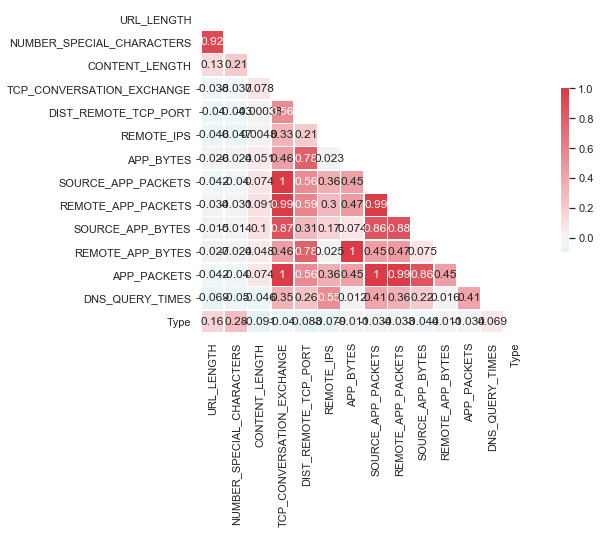

In [7]:
corr = websites.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

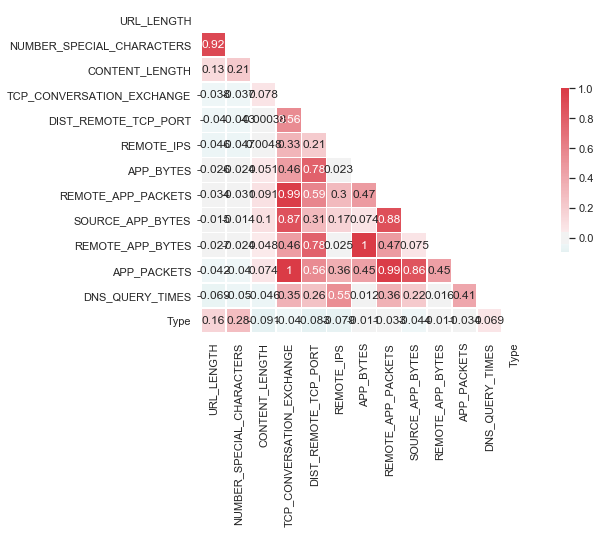

In [8]:
web1 = websites.drop(['SOURCE_APP_PACKETS'],axis=1)
corr = web1.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

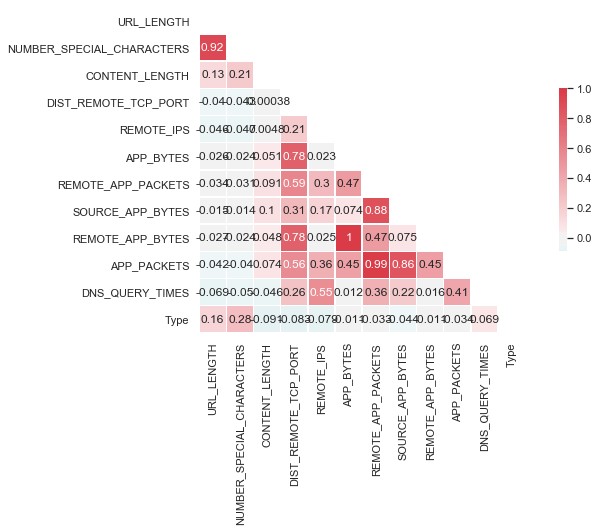

In [9]:
web2 = web1.drop(['TCP_CONVERSATION_EXCHANGE'],axis=1)
corr = web2.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

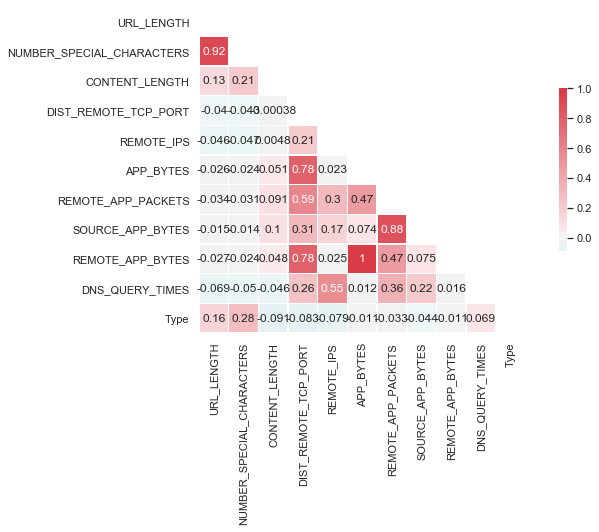

In [10]:
web3 = web2.drop(['APP_PACKETS'],axis=1)
corr = web3.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

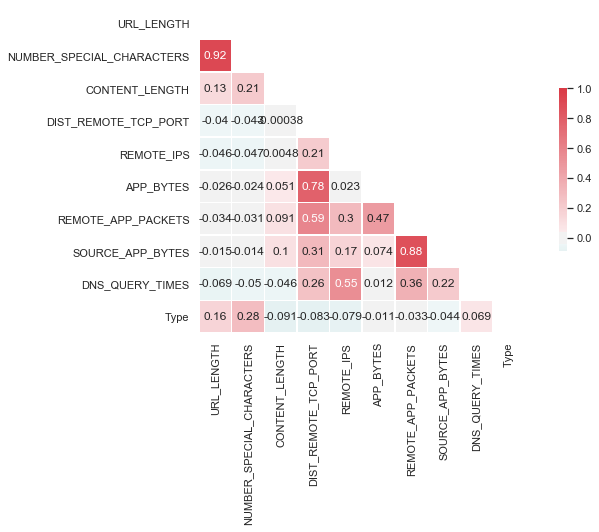

In [11]:
web4 = web3.drop(['REMOTE_APP_BYTES'],axis=1)
corr = web4.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

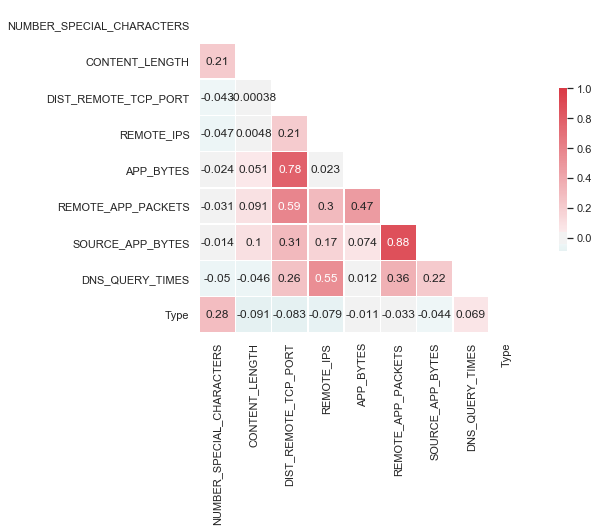

In [12]:
web5 = web4.drop(['URL_LENGTH'],axis=1)
corr = web5.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

- We had to remove 5 features (SOURCE_APP_PACKETS - TCP_CONVERSATION_EXCHANGE - APP_PACKETS - REMOTE_APP_BYTES - URL_LENGTH) in order to avoid any correlation over 90% that would imply colinearity between features and would make our model less accurate of even useless.

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [13]:
web5.isna().sum()


URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [14]:
ratio = ((web5.CONTENT_LENGTH.isna().sum()) / (web5.CONTENT_LENGTH.isna().sum() + web5.CONTENT_LENGTH.count()))
ratio

0.45592363840539024

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
#we are droping CONTENT_LENGTH because it's missing in nearly half of the entries
web_clean = web5.drop(columns=['CONTENT_LENGTH'], axis=1)

In [16]:
#now we drop the 2 entries that have a NaN.
web_clean = web_clean.dropna()
web_clean.head()

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,700,10,1153,2.0,1
1,B0_2314,6,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1230,19,1265,0.0,0
2,B0_911,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,37,18784,8.0,0
4,B0_403,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,4278,62,129889,4.0,0


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [17]:
web_clean.isna().sum()
#all clean

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [18]:
web_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   WHOIS_STATEPRO             1779 non-null   object 
 6   WHOIS_REGDATE              1779 non-null   object 
 7   WHOIS_UPDATED_DATE         1779 non-null   object 
 8   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 9   REMOTE_IPS                 1779 non-null   int64  
 10  APP_BYTES                  1779 non-null   int64  
 11  REMOTE_APP_PACKETS         1779 non-null   int64  
 12  SOURCE_APP_BYTES           1779 non-null   int64  
 13  DNS_QUERY_TIMES            1779 non-null   float

In [19]:
# Your comment here
#we can see how now we have 2 entries less (the two nans from the beginning and we don't have CONTENT_LENGTH or any of the 
#features that had colinearity)

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [20]:
web_clean.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [21]:
web_clean.replace({'WHOIS_COUNTRY':{'us':'US', 'se':'SE', 'United Kingdom':'UK', 'GB':'UK', "[u'GB'; u'UK']":'UK', 'Cyprus': 'CY'}}, inplace = True)
web_clean.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [22]:
web_clean2 = web_clean.loc[web_clean['WHOIS_COUNTRY']!='None'].copy()

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [23]:
web_clean2.WHOIS_COUNTRY.value_counts()


US    1105
CA      83
ES      63
UK      35
AU      35
PA      21
JP      11
IN      10
CN      10
CZ       9
FR       9
CH       6
NL       6
KR       5
PH       4
ru       4
BS       4
SE       4
AT       4
DE       3
KY       3
HK       3
BE       3
SC       3
TR       3
BR       2
SI       2
CY       2
UA       2
UY       2
IL       2
RU       2
KG       2
NO       2
LU       1
UG       1
BY       1
LV       1
IT       1
IE       1
PK       1
TH       1
AE       1
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [24]:
dic = dict(web_clean2.WHOIS_COUNTRY.value_counts())
lst = ["US", "CA", "ES", "AU", "UK", "PA", "JP", "IN", "CN",  "CZ"]
for i in lst:
    del dic[i]
for key,value in dic.items(): 
    dic[key] = 'Other'
dic

{'FR': 'Other',
 'CH': 'Other',
 'NL': 'Other',
 'KR': 'Other',
 'PH': 'Other',
 'ru': 'Other',
 'BS': 'Other',
 'SE': 'Other',
 'AT': 'Other',
 'DE': 'Other',
 'KY': 'Other',
 'HK': 'Other',
 'BE': 'Other',
 'SC': 'Other',
 'TR': 'Other',
 'BR': 'Other',
 'SI': 'Other',
 'CY': 'Other',
 'UA': 'Other',
 'UY': 'Other',
 'IL': 'Other',
 'RU': 'Other',
 'KG': 'Other',
 'NO': 'Other',
 'LU': 'Other',
 'UG': 'Other',
 'BY': 'Other',
 'LV': 'Other',
 'IT': 'Other',
 'IE': 'Other',
 'PK': 'Other',
 'TH': 'Other',
 'AE': 'Other'}

In [25]:
web_clean2.replace({"WHOIS_COUNTRY": dic}, inplace=True)

In [26]:
web_clean2.WHOIS_COUNTRY.value_counts()

US       1105
Other      91
CA         83
ES         63
UK         35
AU         35
PA         21
JP         11
CN         10
IN         10
CZ          9
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [27]:
web_clean3 = web_clean2.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)
web_clean3.head()


,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,6,ISO-8859-1,nginx,US,22,3,3812,37,18784,8.0,0
4,B0_403,6,UTF-8,None,US,2,5,4278,62,129889,4.0,0
5,B0_2064,7,UTF-8,nginx,Other,6,9,894,13,838,0.0,0
6,B0_462,6,iso-8859-1,Apache/2,US,0,3,1189,13,8559,2.0,0
7,B0_1128,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0.0,0


In [28]:
web_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1473 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1473 non-null   int64  
 2   CHARSET                    1473 non-null   object 
 3   SERVER                     1473 non-null   object 
 4   WHOIS_COUNTRY              1473 non-null   object 
 5   DIST_REMOTE_TCP_PORT       1473 non-null   int64  
 6   REMOTE_IPS                 1473 non-null   int64  
 7   APP_BYTES                  1473 non-null   int64  
 8   REMOTE_APP_PACKETS         1473 non-null   int64  
 9   SOURCE_APP_BYTES           1473 non-null   int64  
 10  DNS_QUERY_TIMES            1473 non-null   float64
 11  Type                       1473 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 149.6+ KB


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [29]:
web_clean3.dtypes


URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [30]:
web_clean4 = web_clean3.drop(['URL'], axis = 1)


In [31]:
web_clean4.head()

,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,6,ISO-8859-1,nginx,US,22,3,3812,37,18784,8.0,0
4,6,UTF-8,None,US,2,5,4278,62,129889,4.0,0
5,7,UTF-8,nginx,Other,6,9,894,13,838,0.0,0
6,6,iso-8859-1,Apache/2,US,0,3,1189,13,8559,2.0,0
7,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0.0,0


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [32]:
web_clean4.CHARSET.unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8', 'None',
       'windows-1251', 'windows-1252'], dtype=object)

In [33]:
web_clean4.CHARSET.value_counts()

UTF-8           563
ISO-8859-1      364
utf-8           322
us-ascii        121
iso-8859-1       94
None              7
windows-1252      1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [34]:
web_clean4.SERVER.value_counts()


Apache                                                                                        323
None                                                                                          154
nginx                                                                                         147
Microsoft-HTTPAPI/2.0                                                                          86
cloudflare-nginx                                                                               81
                                                                                             ... 
Apache/2.2.11 (Unix) PHP/5.2.6                                                                  1
mw2107.codfw.wmnet                                                                              1
Apache/2.2.26 (Unix) mod_ssl/2.2.26 OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4 PHP/5.4.26      1
Apache/Not telling (Unix) AuthTDS/1.1                                                           1
Apache/2.4.6 (CentOS

![Think Hard](../images/think-hard.jpg)

In [35]:
#I'm seeing that there are too many unique values, but maybe we can take only
#the first word that is the actual name of the server?


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [36]:
#here we are changing all Server values that contain any of the 3 main servers into
#just that server.
lst2 = ["Microsoft", "Apache", "nginx"]
for i in lst2:
    web_clean4["SERVER"].loc[web_clean4["SERVER"].str.contains(f'{i}')] = f'{i}'

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
#we can see how the value_counts for the 3 main server has increased
dic2 = dict(web_clean4.SERVER.value_counts())
web_clean4.SERVER.value_counts()

Apache                520
nginx                 329
Microsoft             158
None                  154
GSE                    49
                     ... 
mw2257.codfw.wmnet      1
mw2172.codfw.wmnet      1
Cowboy                  1
mw2232.codfw.wmnet      1
mw2187.codfw.wmnet      1
Name: SERVER, Length: 101, dtype: int64

In [47]:
#here we do the same that we did for the countries
for i in lst2:
    del dic2[i]
for key, value in dic2.items(): 
    dic2[key] = 'Other'

In [61]:
web_clean4

,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,6,ISO-8859-1,nginx,US,22,3,3812,37,18784,8.0,0
4,6,UTF-8,None,US,2,5,4278,62,129889,4.0,0
5,7,UTF-8,nginx,Other,6,9,894,13,838,0.0,0
6,6,iso-8859-1,Apache,US,0,3,1189,13,8559,2.0,0
7,6,us-ascii,Microsoft,US,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1776,16,UTF-8,Apache,ES,0,0,0,3,186,0.0,1
1777,17,UTF-8,Apache,ES,0,0,0,2,124,0.0,1
1778,34,utf-8,Apache,US,2,6,6631,89,132181,4.0,0
1779,34,ISO-8859-1,nginx,US,0,0,0,0,0,0.0,0


In [66]:
web_clean4.replace({"SERVER": dic2}, inplace=True)

In [67]:
web_clean4.SERVER.value_counts()

Apache       520
Other        466
nginx        329
Microsoft    158
Name: SERVER, dtype: int64

In [68]:
web_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 3 to 1780
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NUMBER_SPECIAL_CHARACTERS  1473 non-null   int64  
 1   CHARSET                    1473 non-null   object 
 2   SERVER                     1473 non-null   object 
 3   WHOIS_COUNTRY              1473 non-null   object 
 4   DIST_REMOTE_TCP_PORT       1473 non-null   int64  
 5   REMOTE_IPS                 1473 non-null   int64  
 6   APP_BYTES                  1473 non-null   int64  
 7   REMOTE_APP_PACKETS         1473 non-null   int64  
 8   SOURCE_APP_BYTES           1473 non-null   int64  
 9   DNS_QUERY_TIMES            1473 non-null   float64
 10  Type                       1473 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 138.1+ KB


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [77]:
charset_dummy = pd.get_dummies(web_clean4["CHARSET"], drop_first=True)
charset_dummy.head()

,None,UTF-8,iso-8859-1,us-ascii,utf-8,windows-1251,windows-1252
3,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,1,0,0,0


In [78]:
server_dummy = pd.get_dummies(web_clean4["SERVER"], drop_first=True)
server_dummy.head()

,Microsoft,Other,nginx
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,0
7,1,0,0


In [79]:
country_dummy = pd.get_dummies(web_clean4["WHOIS_COUNTRY"], drop_first=True)
country_dummy.head()

,CA,CN,CZ,ES,IN,JP,Other,PA,UK,US
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1


In [83]:
website_dummy = pd.concat([web_clean4,charset_dummy,server_dummy,country_dummy], axis=1)

In [84]:
website_dummy.head()

,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,...,CA,CN,CZ,ES,IN,JP,Other,PA,UK,US
3,6,ISO-8859-1,nginx,US,22,3,3812,37,18784,8.0,...,0,0,0,0,0,0,0,0,0,1
4,6,UTF-8,Other,US,2,5,4278,62,129889,4.0,...,0,0,0,0,0,0,0,0,0,1
5,7,UTF-8,nginx,Other,6,9,894,13,838,0.0,...,0,0,0,0,0,0,1,0,0,0
6,6,iso-8859-1,Apache,US,0,3,1189,13,8559,2.0,...,0,0,0,0,0,0,0,0,0,1
7,6,us-ascii,Microsoft,US,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
website_dummy.drop(columns=["CHARSET", "SERVER", "WHOIS_COUNTRY"], inplace = True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [87]:
website_dummy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 3 to 1780
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NUMBER_SPECIAL_CHARACTERS  1473 non-null   int64  
 1   DIST_REMOTE_TCP_PORT       1473 non-null   int64  
 2   REMOTE_IPS                 1473 non-null   int64  
 3   APP_BYTES                  1473 non-null   int64  
 4   REMOTE_APP_PACKETS         1473 non-null   int64  
 5   SOURCE_APP_BYTES           1473 non-null   int64  
 6   DNS_QUERY_TIMES            1473 non-null   float64
 7   Type                       1473 non-null   int64  
 8   None                       1473 non-null   uint8  
 9   UTF-8                      1473 non-null   uint8  
 10  iso-8859-1                 1473 non-null   uint8  
 11  us-ascii                   1473 non-null   uint8  
 12  utf-8                      1473 non-null   uint8  
 13  windows-1251               1473 non-null   uint8

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [130]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(website_dummy.Type)
X = website_dummy.drop(['Type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [131]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(solver='lbfgs',multi_class='ovr')

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [132]:
clf.fit(X_train, y_train)



C:\Users\Andreu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Andreu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [133]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [134]:
y_predictions = clf.predict(X_test)
y_predictions[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [135]:
accuracy_score(y_test, y_predictions)

0.9186440677966101

In [136]:
y_test[:10]

,Type
1035,1
1695,0
700,0
1193,0
1450,0
1632,1
1762,0
841,0
99,0
977,0


In [137]:
clf.predict_proba(X_test)[:10]

array([[1.00000000e+00, 8.25792976e-11],
       [8.94605308e-01, 1.05394692e-01],
       [8.50702834e-01, 1.49297166e-01],
       [9.99999171e-01, 8.28975697e-07],
       [3.49809133e-01, 6.50190867e-01],
       [4.08715760e-01, 5.91284240e-01],
       [1.00000000e+00, 8.13967389e-21],
       [9.99661011e-01, 3.38988812e-04],
       [1.00000000e+00, 7.30142545e-17],
       [9.87293513e-01, 1.27064874e-02]])

In [138]:
confusion_matrix(y_test, y_predictions)

array([[249,   9],
       [ 15,  22]], dtype=int64)

What are your thoughts on the performance of the model? Write your conclusions below.

In [111]:
# Your conclusions here:
#The model performs pretty well, because it has a 91,8% accuraccy, this means
#that, 91,8% of the times, the model will predict correctly if the web is malicious 
#or not. 
#Although we can see that it's better at predicting when a website is benign than
#if the website is malicious


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [139]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [140]:
model.fit(X_train, y_train)

C:\Users\Andreu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [144]:
y_pred = model.predict(X_test)
y_pred[:10]


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [145]:
y_test[:10]

,Type
1035,1
1695,0
700,0
1193,0
1450,0
1632,1
1762,0
841,0
99,0
977,0


In [147]:
accuracy_score(y_test, y_pred)

0.9389830508474576

In [149]:
confusion_matrix(y_test, y_pred)

array([[255,   3],
       [ 15,  22]], dtype=int64)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [150]:
model5 = KNeighborsClassifier(n_neighbors=5)

In [151]:
model5.fit(X_train, y_train)

C:\Users\Andreu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [155]:
y_pred2 = model5.predict(X_test)
y_pred2[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [156]:
y_test[:10]

,Type
1035,1
1695,0
700,0
1193,0
1450,0
1632,1
1762,0
841,0
99,0
977,0


In [157]:
accuracy_score(y_test, y_pred2)

0.9457627118644067

In [159]:
confusion_matrix(y_test, y_pred2)

array([[257,   1],
       [ 15,  22]], dtype=int64)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [160]:
# Your conclusions here:
# the overall accuracy has improved, but we see all the new correct predictions 
# are benign websites, the confusion matrix shows the same amount of errors when
#the website is malicious.


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here